## Libraries

In [197]:
# Import libraries
import pandas as pd
import numpy as np
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [198]:
# Read the csv file
df = pd.read_csv("../data/cleaned_properties.csv")

# Display the head
display(df.head())
df.shape
df.columns

# Filter the DataFrame for values APARTMENT and APARTMENT_BLOCK
df_house1 = df[df["property_type"] == "HOUSE"]
df_house2 = df_house1[df_house1['subproperty_type'] != 'APARTMENT_BLOCK']

df_house = df[(df["property_type"] == "HOUSE") & (df['subproperty_type'] != 'APARTMENT_BLOCK')]

df_house.head()
print(df_house.info())
print(df_house.shape)

print(df_house["property_type"].unique())
print(df_house["subproperty_type"].unique())
df_house["locality"].unique()
print(df_house["locality"].unique())
df_house.isna().sum().sort_values(ascending=False)

,price,property_type,subproperty_type,region,province,locality,zip_code,construction_year,total_area_sqm,surface_land_sqm,...,fl_garden,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income
0,225000.0,APARTMENT,APARTMENT,Flanders,Antwerp,Antwerp,2050,1963.0,100.0,NaN,...,0,0.0,0,0,NaN,231.0,C,GAS,1,922.0
1,449000.0,HOUSE,HOUSE,Flanders,East Flanders,Gent,9185,NaN,NaN,680.0,...,0,0.0,0,0,NaN,221.0,C,NaN,1,406.0
2,335000.0,APARTMENT,APARTMENT,Brussels-Capital,Brussels,Brussels,1070,NaN,142.0,NaN,...,0,0.0,0,1,AS_NEW,NaN,NaN,GAS,0,NaN
3,501000.0,HOUSE,HOUSE,Flanders,Antwerp,Turnhout,2275,2024.0,187.0,505.0,...,0,0.0,0,1,NaN,99.0,A,NaN,0,NaN
4,982700.0,APARTMENT,DUPLEX,Wallonia,Walloon Brabant,Nivelles,1410,2022.0,169.0,NaN,...,1,142.0,0,0,AS_NEW,19.0,A+,GAS,0,NaN


<class 'pandas.core.frame.DataFrame'>
Index: 37211 entries, 1 to 75506
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price                           37211 non-null  float64
 1   property_type                   37211 non-null  object 
 2   subproperty_type                37211 non-null  object 
 3   region                          37211 non-null  object 
 4   province                        37211 non-null  object 
 5   locality                        37211 non-null  object 
 6   zip_code                        37211 non-null  int64  
 7   construction_year               19969 non-null  float64
 8   total_area_sqm                  32360 non-null  float64
 9   surface_land_sqm                37211 non-null  float64
 10  nbr_frontages                   29563 non-null  float64
 11  nbr_bedrooms                    37211 non-null  float64
 12  equipped_kitchen                20753

construction_year                 17242
cadastral_income                  17168
equipped_kitchen                  16458
heating_type                      13276
state_building                    11529
primary_energy_consumption_sqm    10070
terrace_sqm                        8818
epc                                8721
nbr_frontages                      7648
total_area_sqm                     4851
garden_sqm                         2361
fl_double_glazing                     0
fl_floodzone                          0
fl_swimming_pool                      0
fl_garden                             0
price                                 0
fl_terrace                            0
fl_open_fire                          0
property_type                         0
nbr_bedrooms                          0
surface_land_sqm                      0
zip_code                              0
locality                              0
province                              0
region                                0


## Splitting the data

Creating variables X and y: define the target and the feature.

In [199]:
# Name X and y (specific columns=subset(houses))
#X = df_house.drop(columns=['price', 'locality',, 'property_type', 'zip_code','nbr_frontages' ,'construction_year','fl_open_fire' , 'cadastral_income', ,, , 'province','fl_floodzone' ])
X = df_house[['region', 'subproperty_type', 'surface_land_sqm', 'total_area_sqm', 'nbr_bedrooms', 'equipped_kitchen', 'fl_furnished', 'fl_terrace', 'terrace_sqm', 'fl_garden', 'garden_sqm', 'fl_swimming_pool', 'state_building', 'primary_energy_consumption_sqm', 'epc', 'heating_type', 'fl_double_glazing']]
y = df_house['price']

# Print shape
print("X shape: ", X.shape)
print("y-shape: ", y.shape)

# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

X_train.info()
print(X_train.columns.tolist())

X shape:  (37211, 17)
y-shape:  (37211,)
<class 'pandas.core.frame.DataFrame'>
Index: 29768 entries, 8081 to 31954
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   region                          29768 non-null  object 
 1   subproperty_type                29768 non-null  object 
 2   surface_land_sqm                29768 non-null  float64
 3   total_area_sqm                  25900 non-null  float64
 4   nbr_bedrooms                    29768 non-null  float64
 5   equipped_kitchen                16580 non-null  object 
 6   fl_furnished                    29768 non-null  int64  
 7   fl_terrace                      29768 non-null  int64  
 8   terrace_sqm                     22712 non-null  float64
 9   fl_garden                       29768 non-null  int64  
 10  garden_sqm                      27915 non-null  float64
 11  fl_swimming_pool                29768 non-null  int64 

## 1. Imputing missing values

Impute missing values:
- numerical: mean
- categorical: most frequent

In [200]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Define DataFrame with missing values
df = X_train
df2 = X_test

# Select columns with numerical and categorical data
numeric_cols = df.select_dtypes(exclude='object').columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Impute missing values for numerical columns
numeric_imputer = SimpleImputer(strategy='mean')  # You can choose 'mean', 'median', 'most_frequent', or a constant value
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])
df2[numeric_cols] = numeric_imputer.transform(df2[numeric_cols])

# Impute missing values for categorical columns

categorical_imputer = SimpleImputer(strategy='most_frequent')  # You can choose 'most_frequent', 'constant', or a custom value
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])
df2[categorical_cols] = categorical_imputer.transform(df2[categorical_cols])

# Display the first few rows of the training and testing sets after imputation
print("Training set after imputation:")
display(df.head())
print("\nTesting set after imputation:")
display(df2.head())


Training set after imputation:


,region,subproperty_type,surface_land_sqm,total_area_sqm,nbr_bedrooms,equipped_kitchen,fl_furnished,fl_terrace,terrace_sqm,fl_garden,garden_sqm,fl_swimming_pool,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing
8081,Flanders,HOUSE,610.0,159.000000,3.0,INSTALLED,0.0,0.0,0.000000,1.0,210.254917,0.0,GOOD,0.0,F,GAS,1.0
49412,Flanders,HOUSE,120.0,108.000000,3.0,INSTALLED,0.0,0.0,0.000000,0.0,0.000000,0.0,GOOD,20.0,A,GAS,0.0
44216,Flanders,MIXED_USE_BUILDING,270.0,130.000000,2.0,NOT_INSTALLED,0.0,1.0,6.000000,0.0,0.000000,0.0,TO_RENOVATE,1.0,A,GAS,1.0
1348,Flanders,VILLA,1990.0,215.989266,4.0,INSTALLED,0.0,1.0,11.164539,0.0,0.000000,0.0,GOOD,20.0,A,GAS,1.0
61466,Flanders,HOUSE,244.0,120.000000,3.0,INSTALLED,0.0,0.0,0.000000,0.0,0.000000,0.0,GOOD,161.0,B,GAS,1.0



Testing set after imputation:


,region,subproperty_type,surface_land_sqm,total_area_sqm,nbr_bedrooms,equipped_kitchen,fl_furnished,fl_terrace,terrace_sqm,fl_garden,garden_sqm,fl_swimming_pool,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing
25920,Flanders,HOUSE,211.0,170.0,3.0,INSTALLED,0.0,0.0,0.0,1.0,78.000000,0.0,GOOD,106.000000,B,GAS,1.0
55220,Wallonia,HOUSE,170.0,160.0,3.0,SEMI_EQUIPPED,0.0,1.0,15.0,1.0,210.254917,0.0,GOOD,441.000000,F,GAS,1.0
11353,Flanders,HOUSE,1376.0,295.0,5.0,INSTALLED,0.0,0.0,0.0,0.0,0.000000,0.0,GOOD,294.000000,C,GAS,1.0
12988,Wallonia,HOUSE,360.0,112.0,3.0,INSTALLED,0.0,0.0,0.0,1.0,210.254917,0.0,GOOD,348.000000,E,FUELOIL,1.0
15657,Wallonia,HOUSE,554.0,198.0,3.0,INSTALLED,0.0,1.0,38.0,0.0,0.000000,0.0,GOOD,2371.656411,F,GAS,1.0


Function: Imputing missing values for X_train

In [217]:
from sklearn.impute import SimpleImputer
import pandas as pd

def impute_data(X_train):
    """
    Imputes missing values in both numerical and categorical columns of the input DataFrame using SimpleImputer.

    Parameters:
    -----------
    X_train : pandas DataFrame
        Input DataFrame containing columns with missing values.

    Returns:
    --------
    pandas DataFrame
        DataFrame with missing values imputed.
    """
    # Select columns with numerical and categorical data
    numeric_cols = X_train.select_dtypes(exclude='object').columns.tolist()
    categorical_cols = X_train.select_dtypes(include='object').columns.tolist()

    # Impute missing values for numerical columns
    numeric_imputer = SimpleImputer(strategy='mean')  
    X_train[numeric_cols] = numeric_imputer.fit_transform(X_train[numeric_cols])

    # Impute missing values for categorical columns
    categorical_imputer = SimpleImputer(strategy='most_frequent')  
    X_train[categorical_cols] = categorical_imputer.fit_transform(X_train[categorical_cols])

    #return X_train

# Example usage:
#X_train_imputed = impute_data(X_train)
print(X_train.isna().sum().sort_values(ascending=False))

region                            0
fl_garden                         0
heating_type                      0
epc                               0
primary_energy_consumption_sqm    0
state_building                    0
fl_swimming_pool                  0
garden_sqm                        0
terrace_sqm                       0
subproperty_type                  0
fl_terrace                        0
fl_furnished                      0
equipped_kitchen                  0
nbr_bedrooms                      0
total_area_sqm                    0
surface_land_sqm                  0
fl_double_glazing                 0
dtype: int64


Function: Imputing missing values for X_train and X_test

In [218]:
from sklearn.impute import SimpleImputer
import pandas as pd

def impute_missing_values(X_train_imputed, X_test_imputed):
    """
    Imputes missing values in both numerical and categorical columns of training and testing DataFrames.

    Parameters:
    X_train_imputed (DataFrame): The training DataFrame containing missing values.
    X_test_imputed (DataFrame): The testing DataFrame containing missing values.

    Returns:
    X_train_imputed (DataFrame): The training DataFrame with missing values imputed.
    X_test_imputed (DataFrame): The testing DataFrame with missing values imputed.
    """
    # Select columns with numerical and categorical data
    numeric_cols = X_train_imputed.select_dtypes(exclude='object').columns.tolist()
    categorical_cols = X_train_imputed.select_dtypes(include='object').columns.tolist()

    # Impute missing values for numerical columns
    numeric_imputer = SimpleImputer(strategy='mean')  
    X_train_imputed[numeric_cols] = numeric_imputer.fit_transform(X_train_imputed[numeric_cols])
    X_test_imputed[numeric_cols] = numeric_imputer.transform(X_test_imputed[numeric_cols])

    # Impute missing values for categorical columns
    categorical_imputer = SimpleImputer(strategy='most_frequent')  
    X_train_imputed[categorical_cols] = categorical_imputer.fit_transform(X_train_imputed[categorical_cols])
    X_test_imputed[categorical_cols] = categorical_imputer.transform(X_test_imputed[categorical_cols])

    return X_train_imputed, X_test_imputed

# Call the function with the train and test DF as input and store the returned imputed DF.
X_train_imputed, X_test_imputed = impute_missing_values(X_train.copy(), X_test.copy())

# Display the first few rows of the training and testing sets after imputation
print("Training set after imputation:")
display(X_train_imputed.head())
print("\nTesting set after imputation:")
display(X_test_imputed.head())


Training set after imputation:


,region,subproperty_type,surface_land_sqm,total_area_sqm,nbr_bedrooms,equipped_kitchen,fl_furnished,fl_terrace,terrace_sqm,fl_garden,garden_sqm,fl_swimming_pool,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing
8081,Flanders,HOUSE,610.0,159.000000,3.0,INSTALLED,0.0,0.0,0.000000,1.0,210.254917,0.0,GOOD,0.0,F,GAS,1.0
49412,Flanders,HOUSE,120.0,108.000000,3.0,INSTALLED,0.0,0.0,0.000000,0.0,0.000000,0.0,GOOD,20.0,A,GAS,0.0
44216,Flanders,MIXED_USE_BUILDING,270.0,130.000000,2.0,NOT_INSTALLED,0.0,1.0,6.000000,0.0,0.000000,0.0,TO_RENOVATE,1.0,A,GAS,1.0
1348,Flanders,VILLA,1990.0,215.989266,4.0,INSTALLED,0.0,1.0,11.164539,0.0,0.000000,0.0,GOOD,20.0,A,GAS,1.0
61466,Flanders,HOUSE,244.0,120.000000,3.0,INSTALLED,0.0,0.0,0.000000,0.0,0.000000,0.0,GOOD,161.0,B,GAS,1.0



Testing set after imputation:


,region,subproperty_type,surface_land_sqm,total_area_sqm,nbr_bedrooms,equipped_kitchen,fl_furnished,fl_terrace,terrace_sqm,fl_garden,garden_sqm,fl_swimming_pool,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing
25920,Flanders,HOUSE,211.0,170.0,3.0,INSTALLED,0.0,0.0,0.0,1.0,78.000000,0.0,GOOD,106.000000,B,GAS,1.0
55220,Wallonia,HOUSE,170.0,160.0,3.0,SEMI_EQUIPPED,0.0,1.0,15.0,1.0,210.254917,0.0,GOOD,441.000000,F,GAS,1.0
11353,Flanders,HOUSE,1376.0,295.0,5.0,INSTALLED,0.0,0.0,0.0,0.0,0.000000,0.0,GOOD,294.000000,C,GAS,1.0
12988,Wallonia,HOUSE,360.0,112.0,3.0,INSTALLED,0.0,0.0,0.0,1.0,210.254917,0.0,GOOD,348.000000,E,FUELOIL,1.0
15657,Wallonia,HOUSE,554.0,198.0,3.0,INSTALLED,0.0,1.0,38.0,0.0,0.000000,0.0,GOOD,2371.656411,F,GAS,1.0


## 2. Encoding categorical data

Convert categorical data to a numerical form.

Data to convert:  'region', 'province', 'equipped_kitchen', 'state_building', 'epc', 'heating_type'

In [219]:
# Select the columns with categorical values
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
print("columns_to_encode =", categorical_cols)

# Initialize the encoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_array = encoder.fit_transform(X_train[categorical_cols])

# Convert the encoded array into a DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate the encoded DataFrame with the original DataFrame
result_df = pd.concat([X_train, encoded_df], axis=1)

# Drop the original categorical columns if needed
result_df.drop(columns = categorical_cols, axis=1, inplace=True) 

print(result_df.info())
df.isna().sum().sort_values(ascending=False)


columns_to_encode = ['region', 'subproperty_type', 'equipped_kitchen', 'state_building', 'epc', 'heating_type']
<class 'pandas.core.frame.DataFrame'>
Index: 47794 entries, 8081 to 29767
Data columns (total 57 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   surface_land_sqm                       29768 non-null  float64
 1   total_area_sqm                         29768 non-null  float64
 2   nbr_bedrooms                           29768 non-null  float64
 3   fl_furnished                           29768 non-null  float64
 4   fl_terrace                             29768 non-null  float64
 5   terrace_sqm                            29768 non-null  float64
 6   fl_garden                              29768 non-null  float64
 7   garden_sqm                             29768 non-null  float64
 8   fl_swimming_pool                       29768 non-null  float64
 9   primary_energy_consumption_s

region                            0
fl_garden                         0
heating_type                      0
epc                               0
primary_energy_consumption_sqm    0
state_building                    0
fl_swimming_pool                  0
garden_sqm                        0
terrace_sqm                       0
subproperty_type                  0
fl_terrace                        0
fl_furnished                      0
equipped_kitchen                  0
nbr_bedrooms                      0
total_area_sqm                    0
surface_land_sqm                  0
fl_double_glazing                 0
dtype: int64

Function: Encode_data for X_train

In [221]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

def encode_data(X_train):
    """
    Encodes categorical columns in the input DataFrame using OneHotEncoder.

    Parameters:
    -----------
    X_train : pandas DataFrame
        Input DataFrame containing categorical columns to be encoded.

    Returns:
    --------
    pandas DataFrame
        DataFrame with categorical columns encoded using one-hot encoding.
    """
    # Select the columns with categorical values
    categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

    # Initialize the encoder
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    encoded_array = encoder.fit_transform(X_train[categorical_cols])

    # Convert the encoded array into a DataFrame
    encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols))

    # Concatenate the encoded DataFrame with the original DataFrame
    result_df = pd.concat([X_train, encoded_df], axis=1)

    # Drop the original categorical columns if needed
    result_df.drop(columns=categorical_cols, axis=1, inplace=True)

    return result_df

# Example usage:
# X_train_encoded = encode_data(X_train_imputed)


Function: one_hot_encode for X_train, X_test

In [223]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encode(X_train, X_test):
    """
    Encodes categorical columns in the input DataFrames using OneHotEncoder.

    Parameters:
    -----------
    X_train : pandas DataFrame
        Input training DataFrame.
    X_test : pandas DataFrame
        Input test DataFrame.

    Returns:
    --------
    Tuple of pandas DataFrames
        Encoded training and test DataFrames.
    """
    # Select the columns with categorical values
    categorical_cols = X_train.select_dtypes(include=['object']).columns

    # Initialize the encoder
    encoder = OneHotEncoder(handle_unknown='ignore')

    # Fit and transform on training data
    X_train_ohe = encoder.fit_transform(X_train[categorical_cols])

    # Transform test data
    X_test_ohe = encoder.transform(X_test[categorical_cols])

    # Convert the encoded data into DataFrames
    X_train_ohe_df = pd.DataFrame(X_train_ohe.toarray(), columns=encoder.get_feature_names_out(categorical_cols))
    X_test_ohe_df = pd.DataFrame(X_test_ohe.toarray(), columns=encoder.get_feature_names_out(categorical_cols))

    # Drop original categorical columns from both training and test data
    X_train.drop(columns=categorical_cols, inplace=True)
    X_test.drop(columns=categorical_cols, inplace=True)

    # Concatenate encoded data with remaining data
    X_train_ohe = pd.concat([X_train.reset_index(drop=True), X_train_ohe_df.reset_index(drop=True)], axis=1)
    X_test_ohe = pd.concat([X_test.reset_index(drop=True), X_test_ohe_df.reset_index(drop=True)], axis=1)

    return X_train_ohe, X_test_ohe

# Apply one-hot encoding to training and test data
X_train_ohe, X_test_ohe = one_hot_encode(X_train_imputed.copy(), X_test_imputed.copy())

# Display the first few rows of the training and testing sets after encoding
print("Training set after encoding:")
display(X_train_ohe.head())
print(X_train_ohe.columns.tolist())
print("\nTesting set after encoding:")
display(X_test_ohe.head())
print(X_test_ohe.columns.tolist())


Training set after encoding:


,surface_land_sqm,total_area_sqm,nbr_bedrooms,fl_furnished,fl_terrace,terrace_sqm,fl_garden,garden_sqm,fl_swimming_pool,primary_energy_consumption_sqm,...,epc_E,epc_F,epc_G,heating_type_CARBON,heating_type_ELECTRIC,heating_type_FUELOIL,heating_type_GAS,heating_type_PELLET,heating_type_SOLAR,heating_type_WOOD
0,610.0,159.000000,3.0,0.0,0.0,0.000000,1.0,210.254917,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,120.0,108.000000,3.0,0.0,0.0,0.000000,0.0,0.000000,0.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,270.0,130.000000,2.0,0.0,1.0,6.000000,0.0,0.000000,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1990.0,215.989266,4.0,0.0,1.0,11.164539,0.0,0.000000,0.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,244.0,120.000000,3.0,0.0,0.0,0.000000,0.0,0.000000,0.0,161.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


['surface_land_sqm', 'total_area_sqm', 'nbr_bedrooms', 'fl_furnished', 'fl_terrace', 'terrace_sqm', 'fl_garden', 'garden_sqm', 'fl_swimming_pool', 'primary_energy_consumption_sqm', 'fl_double_glazing', 'region_Brussels-Capital', 'region_Flanders', 'region_Wallonia', 'subproperty_type_BUNGALOW', 'subproperty_type_CASTLE', 'subproperty_type_CHALET', 'subproperty_type_COUNTRY_COTTAGE', 'subproperty_type_EXCEPTIONAL_PROPERTY', 'subproperty_type_FARMHOUSE', 'subproperty_type_HOUSE', 'subproperty_type_MANOR_HOUSE', 'subproperty_type_MANSION', 'subproperty_type_MIXED_USE_BUILDING', 'subproperty_type_OTHER_PROPERTY', 'subproperty_type_TOWN_HOUSE', 'subproperty_type_VILLA', 'equipped_kitchen_HYPER_EQUIPPED', 'equipped_kitchen_INSTALLED', 'equipped_kitchen_NOT_INSTALLED', 'equipped_kitchen_SEMI_EQUIPPED', 'equipped_kitchen_USA_HYPER_EQUIPPED', 'equipped_kitchen_USA_INSTALLED', 'equipped_kitchen_USA_SEMI_EQUIPPED', 'equipped_kitchen_USA_UNINSTALLED', 'state_building_AS_NEW', 'state_building_GOOD'

,surface_land_sqm,total_area_sqm,nbr_bedrooms,fl_furnished,fl_terrace,terrace_sqm,fl_garden,garden_sqm,fl_swimming_pool,primary_energy_consumption_sqm,...,epc_E,epc_F,epc_G,heating_type_CARBON,heating_type_ELECTRIC,heating_type_FUELOIL,heating_type_GAS,heating_type_PELLET,heating_type_SOLAR,heating_type_WOOD
0,211.0,170.0,3.0,0.0,0.0,0.0,1.0,78.000000,0.0,106.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,170.0,160.0,3.0,0.0,1.0,15.0,1.0,210.254917,0.0,441.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1376.0,295.0,5.0,0.0,0.0,0.0,0.0,0.000000,0.0,294.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,360.0,112.0,3.0,0.0,0.0,0.0,1.0,210.254917,0.0,348.000000,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,554.0,198.0,3.0,0.0,1.0,38.0,0.0,0.000000,0.0,2371.656411,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


['surface_land_sqm', 'total_area_sqm', 'nbr_bedrooms', 'fl_furnished', 'fl_terrace', 'terrace_sqm', 'fl_garden', 'garden_sqm', 'fl_swimming_pool', 'primary_energy_consumption_sqm', 'fl_double_glazing', 'region_Brussels-Capital', 'region_Flanders', 'region_Wallonia', 'subproperty_type_BUNGALOW', 'subproperty_type_CASTLE', 'subproperty_type_CHALET', 'subproperty_type_COUNTRY_COTTAGE', 'subproperty_type_EXCEPTIONAL_PROPERTY', 'subproperty_type_FARMHOUSE', 'subproperty_type_HOUSE', 'subproperty_type_MANOR_HOUSE', 'subproperty_type_MANSION', 'subproperty_type_MIXED_USE_BUILDING', 'subproperty_type_OTHER_PROPERTY', 'subproperty_type_TOWN_HOUSE', 'subproperty_type_VILLA', 'equipped_kitchen_HYPER_EQUIPPED', 'equipped_kitchen_INSTALLED', 'equipped_kitchen_NOT_INSTALLED', 'equipped_kitchen_SEMI_EQUIPPED', 'equipped_kitchen_USA_HYPER_EQUIPPED', 'equipped_kitchen_USA_INSTALLED', 'equipped_kitchen_USA_SEMI_EQUIPPED', 'equipped_kitchen_USA_UNINSTALLED', 'state_building_AS_NEW', 'state_building_GOOD'

In [224]:
def select_correlated_features(df_features, df_target, target_variable, threshold=0.15):
    """
    Selects features from the DataFrame that have at least some correlation with the target variable.

    Parameters:
    -----------
    df_features : pandas DataFrame
        Input DataFrame containing features.
    df_target : pandas DataFrame
        DataFrame containing the target variable.
    target_variable : str
        Name of the target variable column in df_target.
    threshold : float, optional (default=0.3)
        Minimum absolute correlation coefficient to consider a feature correlated with the target.

    Returns:
    --------
    list
        List of selected features with correlation coefficients above the threshold.
    """
    # Concatenate features and target variable into one DataFrame
    df = pd.concat([df_features, df_target[target_variable]], axis=1)
    display(df.head())
    # Calculate the correlation matrix
    correlation_matrix = df.corr()
    print(correlation_matrix.T)

    # Select features with correlation coefficients above the threshold
    correlated_features = correlation_matrix[abs(correlation_matrix[target_variable]) > threshold][target_variable].index.tolist()
    print("Correlated features are", correlated_features)
    # Remove the target variable from the list of selected features
    correlated_features.remove(target_variable)

    return correlated_features

# Example usage:
# Assuming df_features is your DataFrame containing features,
# df_target is the DataFrame containing the target variable,
# and 'target_variable_name' is the name of the target variable column in df_target
selected_features = select_correlated_features(X_train_ohe, df_house, 'price')
print("Selected features:", selected_features)


,surface_land_sqm,total_area_sqm,nbr_bedrooms,fl_furnished,fl_terrace,terrace_sqm,fl_garden,garden_sqm,fl_swimming_pool,primary_energy_consumption_sqm,...,epc_F,epc_G,heating_type_CARBON,heating_type_ELECTRIC,heating_type_FUELOIL,heating_type_GAS,heating_type_PELLET,heating_type_SOLAR,heating_type_WOOD,price
0,610.0,159.000000,3.0,0.0,0.0,0.000000,1.0,210.254917,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
1,120.0,108.000000,3.0,0.0,0.0,0.000000,0.0,0.000000,0.0,20.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,449000.0
2,270.0,130.000000,2.0,0.0,1.0,6.000000,0.0,0.000000,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
3,1990.0,215.989266,4.0,0.0,1.0,11.164539,0.0,0.000000,0.0,20.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,501000.0
4,244.0,120.000000,3.0,0.0,0.0,0.000000,0.0,0.000000,0.0,161.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN


                                       surface_land_sqm  total_area_sqm  \
surface_land_sqm                               1.000000        0.067382   
total_area_sqm                                 0.067382        1.000000   
nbr_bedrooms                                   0.073395        0.192573   
fl_furnished                                   0.006818        0.028736   
fl_terrace                                    -0.002475        0.010891   
terrace_sqm                                    0.014814        0.058044   
fl_garden                                     -0.002352       -0.011132   
garden_sqm                                     0.148346        0.053114   
fl_swimming_pool                               0.049722        0.111761   
primary_energy_consumption_sqm                -0.000197        0.001101   
fl_double_glazing                             -0.007394       -0.013584   
region_Brussels-Capital                       -0.015946        0.060782   
region_Flanders          

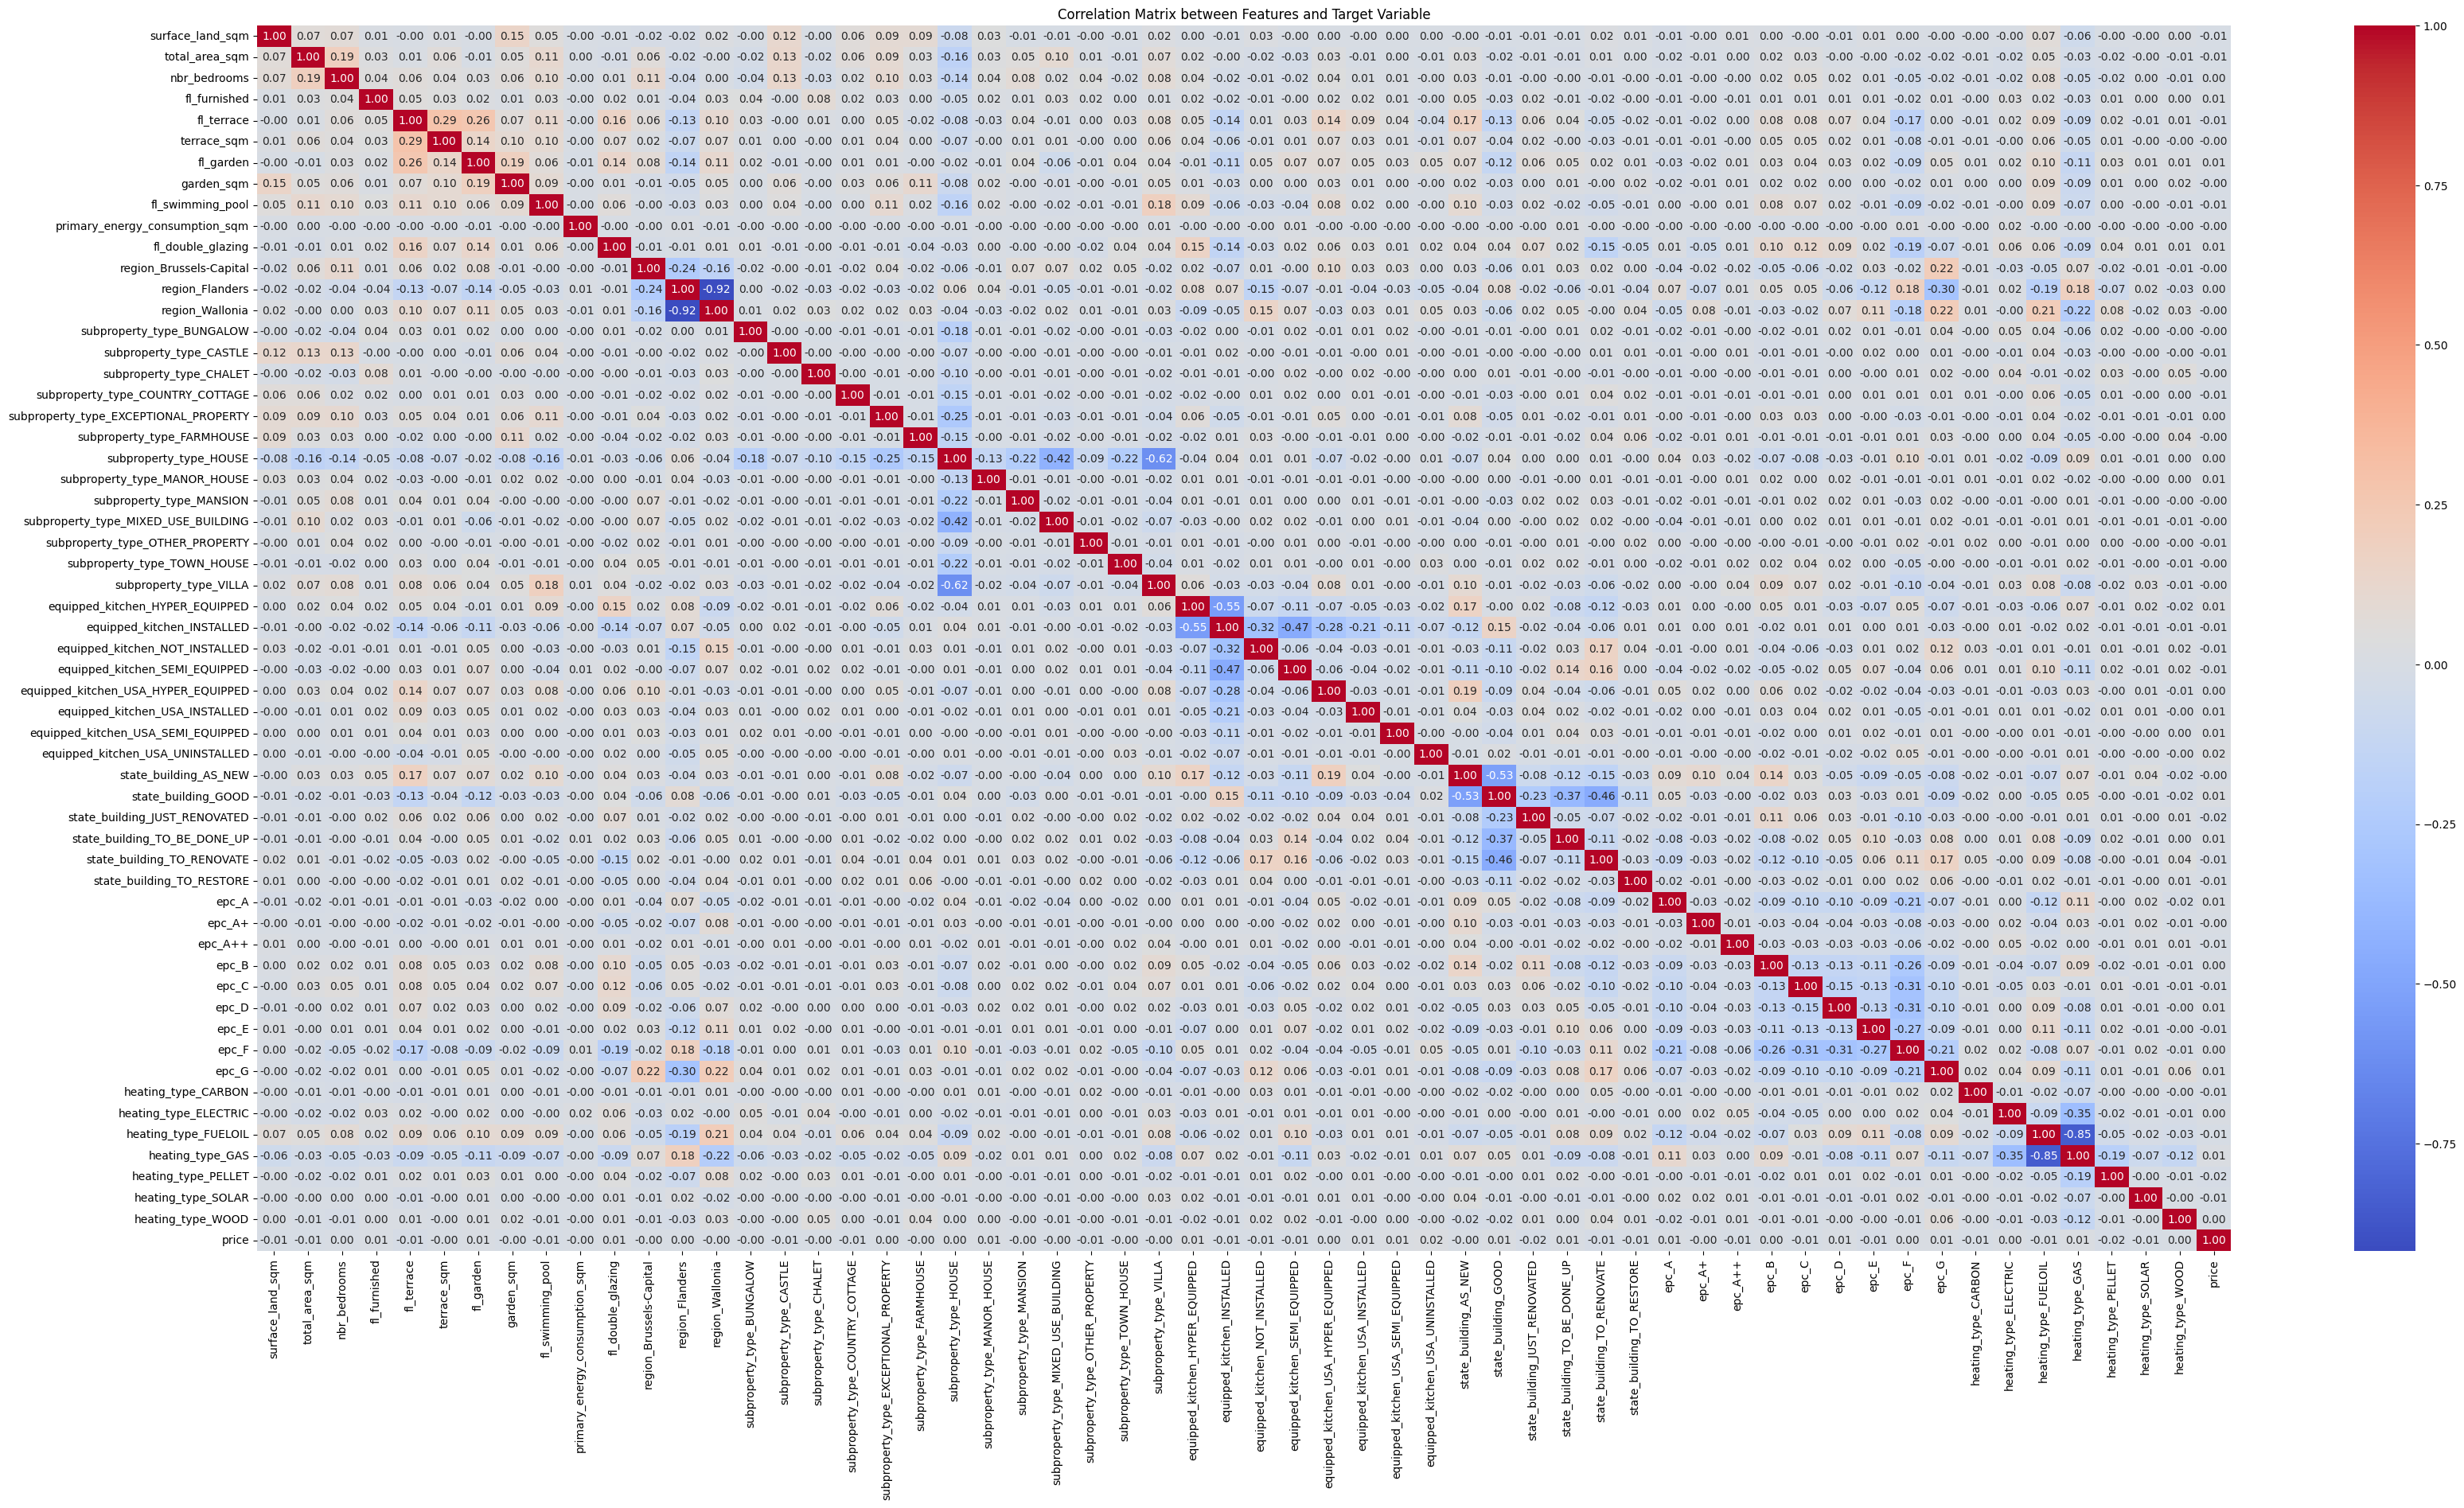

In [225]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_correlation_matrix(df_features, df_target, target_variable):
    """
    Visualizes the correlation matrix between features and the target variable.

    Parameters:
    -----------
    df_features : pandas DataFrame
        Input DataFrame containing features.
    df_target : pandas DataFrame
        DataFrame containing the target variable.
    target_variable : str
        Name of the target variable column in df_target.
    """
    # Concatenate features and target variable into one DataFrame
    df = pd.concat([df_features, df_target[target_variable]], axis=1)

    # Calculate the correlation matrix
    correlation_matrix = df.corr()

    # Plot the correlation matrix heatmap
    plt.figure(figsize=(40, 20))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix between Features and Target Variable')
    return(plt.show())

# Example usage:
# Assuming df_features is your DataFrame containing features,
# df_target is the DataFrame containing the target variable,
# and 'target_variable_name' is the name of the target variable column in df_target
visualize_correlation_matrix(X_train_ohe, df_house, 'price')


## 3. Rescaling numeric features with standardization

In [226]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# X_train_ohe contains numeric features
numeric_features = X_train_ohe.select_dtypes(include=['float64', 'int64'])

# Fit and transform the numeric features in the training set
scaled_features = scaler.fit_transform(numeric_features)

# Convert the scaled features array back to a DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=numeric_features.columns)

# Concatenate scaled numeric features with other columns in the original DataFrame
# Assuming X_train_ohe contains both categorical and numeric features
final_df = pd.concat([X_train_ohe.drop(numeric_features.columns, axis=1), scaled_df], axis=1)

# Use final_df for your linear regression model

# Transform the numeric features in the test set using the parameters learned from the training set
X_test_scaled = scaler.transform(X_test_ohe.select_dtypes(include=['float64', 'int64']))

# Combine the scaled numeric features with the encoded categorical features
# You may need to concatenate these with the encoded categorical features from step 2
# Depending on how you've encoded the categorical features

# Now, X_train_scaled and X_test_scaled contain the rescaled numeric features
# You can use these in your linear regression model

# Transform the numeric features in the test set using the parameters learned from the training set
X_test_scaled = scaler.transform(X_test_ohe.select_dtypes(include=['float64', 'int64']))


# Combine the scaled numeric features with the encoded categorical features
# You may need to concatenate these with the encoded categorical features from step 2
# Depending on how you've encoded the categorical features

# Now, X_train_scaled and X_test_scaled contain the rescaled numeric features
# You can use these in your linear regression model

In [227]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

def scale_numeric_features(X_train_ohe, X_test_ohe):
    """
    Scale the numeric features in the training and test datasets using StandardScaler.

    Parameters:
    - X_train_ohe (DataFrame): DataFrame containing the training data with both numeric and non-numeric features.
    - X_test_ohe (DataFrame): DataFrame containing the test data with both numeric and non-numeric features.

    Returns:
    - X_train_stdv (DataFrame): DataFrame containing the scaled numeric features concatenated with the non-numeric features for training data.
    - X_test_stdv (DataFrame): DataFrame containing the scaled numeric features concatenated with the non-numeric features for test data.
    """
    # Initialize the StandardScaler
    scaler = StandardScaler()

    # Select numeric features for training data
    numeric_features_train = X_train_ohe.select_dtypes(include=['float64', 'int64'])

    # Fit and transform the numeric features in the training set
    scaled_features_train = scaler.fit_transform(numeric_features_train)

    # Convert the scaled training features array back to a DataFrame
    scaled_df_train = pd.DataFrame(scaled_features_train, columns=numeric_features_train.columns)

    # Select numeric features for test data
    numeric_features_test = X_test_ohe.select_dtypes(include=['float64', 'int64'])

    # Transform the numeric features in the test set
    scaled_features_test = scaler.transform(numeric_features_test)

    # Convert the scaled test features array back to a DataFrame
    scaled_df_test = pd.DataFrame(scaled_features_test, columns=numeric_features_test.columns)

    # Concatenate scaled numeric features with other columns in the original DataFrames
    X_train_stdv = pd.concat([X_train_ohe.drop(numeric_features_train.columns, axis=1), scaled_df_train], axis=1)
    X_test_stdv = pd.concat([X_test_ohe.drop(numeric_features_test.columns, axis=1), scaled_df_test], axis=1)

    return X_train_stdv, X_test_stdv

# Example usage:
X_train_stdv, X_test_stdv = scale_numeric_features(X_train_ohe, X_test_ohe)

# Display the first few rows of the training and testing sets after rescaling
print("Training set after rescaling:")
display(X_train_stdv.head())
print(X_train_stdv.columns.tolist())
print("\nTesting set after rescaling:")
display(X_test_stdv.head())
print(X_test_stdv.columns.tolist())


Training set after rescaling:


,surface_land_sqm,total_area_sqm,nbr_bedrooms,fl_furnished,fl_terrace,terrace_sqm,fl_garden,garden_sqm,fl_swimming_pool,primary_energy_consumption_sqm,...,epc_E,epc_F,epc_G,heating_type_CARBON,heating_type_ELECTRIC,heating_type_FUELOIL,heating_type_GAS,heating_type_PELLET,heating_type_SOLAR,heating_type_WOOD
0,-0.055369,-0.204211,-0.229377,-0.105063,-0.985857,-0.282641,1.386315,-3.608826e-17,-0.171756,-0.014308,...,-0.340393,1.267989,-0.263013,-0.03891,-0.187885,-0.460705,0.542095,-0.104572,-0.039766,-0.06362
1,-0.101360,-0.386960,-0.229377,-0.105063,-0.985857,-0.282641,-0.721337,-1.334848e-01,-0.171756,-0.014187,...,-0.340393,-0.788650,-0.263013,-0.03891,-0.187885,-0.460705,0.542095,-0.104572,-0.039766,-0.06362
2,-0.087281,-0.308127,-0.733891,-0.105063,1.014346,-0.130745,-0.721337,-1.334848e-01,-0.171756,-0.014302,...,-0.340393,-0.788650,-0.263013,-0.03891,-0.187885,-0.460705,0.542095,-0.104572,-0.039766,-0.06362
3,0.074158,0.000000,0.275137,-0.105063,1.014346,0.000000,-0.721337,-1.334848e-01,-0.171756,-0.014187,...,-0.340393,-0.788650,-0.263013,-0.03891,-0.187885,-0.460705,0.542095,-0.104572,-0.039766,-0.06362
4,-0.089721,-0.343960,-0.229377,-0.105063,-0.985857,-0.282641,-0.721337,-1.334848e-01,-0.171756,-0.013337,...,-0.340393,-0.788650,-0.263013,-0.03891,-0.187885,-0.460705,0.542095,-0.104572,-0.039766,-0.06362


['surface_land_sqm', 'total_area_sqm', 'nbr_bedrooms', 'fl_furnished', 'fl_terrace', 'terrace_sqm', 'fl_garden', 'garden_sqm', 'fl_swimming_pool', 'primary_energy_consumption_sqm', 'fl_double_glazing', 'region_Brussels-Capital', 'region_Flanders', 'region_Wallonia', 'subproperty_type_BUNGALOW', 'subproperty_type_CASTLE', 'subproperty_type_CHALET', 'subproperty_type_COUNTRY_COTTAGE', 'subproperty_type_EXCEPTIONAL_PROPERTY', 'subproperty_type_FARMHOUSE', 'subproperty_type_HOUSE', 'subproperty_type_MANOR_HOUSE', 'subproperty_type_MANSION', 'subproperty_type_MIXED_USE_BUILDING', 'subproperty_type_OTHER_PROPERTY', 'subproperty_type_TOWN_HOUSE', 'subproperty_type_VILLA', 'equipped_kitchen_HYPER_EQUIPPED', 'equipped_kitchen_INSTALLED', 'equipped_kitchen_NOT_INSTALLED', 'equipped_kitchen_SEMI_EQUIPPED', 'equipped_kitchen_USA_HYPER_EQUIPPED', 'equipped_kitchen_USA_INSTALLED', 'equipped_kitchen_USA_SEMI_EQUIPPED', 'equipped_kitchen_USA_UNINSTALLED', 'state_building_AS_NEW', 'state_building_GOOD'

,surface_land_sqm,total_area_sqm,nbr_bedrooms,fl_furnished,fl_terrace,terrace_sqm,fl_garden,garden_sqm,fl_swimming_pool,primary_energy_consumption_sqm,...,epc_E,epc_F,epc_G,heating_type_CARBON,heating_type_ELECTRIC,heating_type_FUELOIL,heating_type_GAS,heating_type_PELLET,heating_type_SOLAR,heating_type_WOOD
0,-0.092819,-0.164794,-0.229377,-0.105063,-0.985857,-0.282641,1.386315,-8.396486e-02,-0.171756,-0.013668,...,-0.340393,-0.788650,-0.263013,-0.03891,-0.187885,-0.460705,0.542095,-0.104572,-0.039766,-0.06362
1,-0.096667,-0.200627,-0.229377,-0.105063,1.014346,0.097098,1.386315,-3.608826e-17,-0.171756,-0.011647,...,-0.340393,1.267989,-0.263013,-0.03891,-0.187885,-0.460705,0.542095,-0.104572,-0.039766,-0.06362
2,0.016528,0.283121,0.779651,-0.105063,-0.985857,-0.282641,-0.721337,-1.334848e-01,-0.171756,-0.012534,...,-0.340393,-0.788650,-0.263013,-0.03891,-0.187885,-0.460705,0.542095,-0.104572,-0.039766,-0.06362
3,-0.078834,-0.372627,-0.229377,-0.105063,-0.985857,-0.282641,1.386315,-3.608826e-17,-0.171756,-0.012208,...,2.937778,-0.788650,-0.263013,-0.03891,-0.187885,2.170584,-1.844695,-0.104572,-0.039766,-0.06362
4,-0.060625,-0.064461,-0.229377,-0.105063,1.014346,0.679365,-0.721337,-1.334848e-01,-0.171756,0.000000,...,-0.340393,1.267989,-0.263013,-0.03891,-0.187885,-0.460705,0.542095,-0.104572,-0.039766,-0.06362


['surface_land_sqm', 'total_area_sqm', 'nbr_bedrooms', 'fl_furnished', 'fl_terrace', 'terrace_sqm', 'fl_garden', 'garden_sqm', 'fl_swimming_pool', 'primary_energy_consumption_sqm', 'fl_double_glazing', 'region_Brussels-Capital', 'region_Flanders', 'region_Wallonia', 'subproperty_type_BUNGALOW', 'subproperty_type_CASTLE', 'subproperty_type_CHALET', 'subproperty_type_COUNTRY_COTTAGE', 'subproperty_type_EXCEPTIONAL_PROPERTY', 'subproperty_type_FARMHOUSE', 'subproperty_type_HOUSE', 'subproperty_type_MANOR_HOUSE', 'subproperty_type_MANSION', 'subproperty_type_MIXED_USE_BUILDING', 'subproperty_type_OTHER_PROPERTY', 'subproperty_type_TOWN_HOUSE', 'subproperty_type_VILLA', 'equipped_kitchen_HYPER_EQUIPPED', 'equipped_kitchen_INSTALLED', 'equipped_kitchen_NOT_INSTALLED', 'equipped_kitchen_SEMI_EQUIPPED', 'equipped_kitchen_USA_HYPER_EQUIPPED', 'equipped_kitchen_USA_INSTALLED', 'equipped_kitchen_USA_SEMI_EQUIPPED', 'equipped_kitchen_USA_UNINSTALLED', 'state_building_AS_NEW', 'state_building_GOOD'


## Pipeline: Preprocessing data

In [228]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

def preprocess_data(X_train, X_test):
    """
    Preprocesses training and test data including imputation, encoding, and scaling.

    Parameters:
    -----------
    X_train : pandas DataFrame
        Input training DataFrame.
    X_test : pandas DataFrame
        Input test DataFrame.

    Returns:
    --------
    Tuple of pandas DataFrames
        Preprocessed training and test DataFrames.
    """
    # Separate numerical and categorical columns
    numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = X_train.select_dtypes(include=['object']).columns

    # Define preprocessing steps for numerical and categorical data
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Combine preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])


    # Fit and transform the preprocessing steps on training data
    X_train_processed = preprocessor.fit_transform(X_train)
    X_test_processed = preprocessor.transform(X_test)
    
    # Convert the processed data into DataFrames
    X_train_processed = pd.DataFrame(X_train_processed, columns=numeric_cols.tolist() +
                                     preprocessor.named_transformers_['cat']
                                     .named_steps['onehot'].get_feature_names_out(categorical_cols).tolist())
    X_test_processed = pd.DataFrame(X_test_processed, columns=numeric_cols.tolist() +
                                    preprocessor.named_transformers_['cat']
                                    .named_steps['onehot'].get_feature_names_out(categorical_cols).tolist())

    return X_train_processed, X_test_processed

# Preprocess training and test data
X_train_processed, X_test_processed = preprocess_data(X_train, X_test)


ValueError: Shape of passed values is (29768, 1), indices imply (29768, 57)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

def preprocess_data(X_train, X_test):
    """
    Preprocesses training and test data including imputation, encoding, and scaling.

    Parameters:
    -----------
    X_train : pandas DataFrame
        Input training DataFrame.
    X_test : pandas DataFrame
        Input test DataFrame.

    Returns:
    --------
    Tuple of pandas DataFrames
        Preprocessed training and test DataFrames.
    """
    # Separate numerical and categorical columns
    numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = X_train.select_dtypes(include=['object']).columns

    # Define preprocessing steps for numerical and categorical data
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Combine preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])


    # Fit and transform the preprocessing steps on training data
    X_train_processed = preprocessor.fit_transform(X_train)
    X_test_processed = preprocessor.transform(X_test)

    # Get feature names for one-hot encoded categorical columns
    feature_names = list(numeric_cols) + \
                    list(preprocessor.named_transformers_['cat']
                         .named_steps['onehot'].get_feature_names_out(categorical_cols))
    
    # Convert the processed data into DataFrames
    X_train_processed = pd.DataFrame(X_train_processed, columns=feature_names)

    X_test_processed = pd.DataFrame(X_test_processed, columns=feature_names)
                                    

    return X_train_processed, X_test_processed

# Preprocess training and test data
X_train_processed, X_test_processed = preprocess_data(X_train, X_test)


ValueError: Shape of passed values is (29768, 1), indices imply (29768, 57)

In [ ]:
# Display the first few rows of the training and testing sets after preprocessing
print("Training set after processing:")
display(X_train_processed.head())
print("\nTesting set after processing:")
display(X_test_processed.head())

Training set after processing:


,surface_land_sqm,total_area_sqm,nbr_bedrooms,fl_furnished,fl_terrace,terrace_sqm,fl_garden,garden_sqm,fl_swimming_pool,primary_energy_consumption_sqm,...,epc_E,epc_F,epc_G,heating_type_CARBON,heating_type_ELECTRIC,heating_type_FUELOIL,heating_type_GAS,heating_type_PELLET,heating_type_SOLAR,heating_type_WOOD
0,-0.055369,-0.204211,-0.229377,-0.105063,-0.985857,-0.282641,1.386315,-3.608826e-17,-0.171756,-0.014308,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.101360,-0.386960,-0.229377,-0.105063,-0.985857,-0.282641,-0.721337,-1.334848e-01,-0.171756,-0.014187,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.087281,-0.308127,-0.733891,-0.105063,1.014346,-0.130745,-0.721337,-1.334848e-01,-0.171756,-0.014302,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.074158,0.000000,0.275137,-0.105063,1.014346,0.000000,-0.721337,-1.334848e-01,-0.171756,-0.014187,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.089721,-0.343960,-0.229377,-0.105063,-0.985857,-0.282641,-0.721337,-1.334848e-01,-0.171756,-0.013337,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0



Testing set after processing:


,surface_land_sqm,total_area_sqm,nbr_bedrooms,fl_furnished,fl_terrace,terrace_sqm,fl_garden,garden_sqm,fl_swimming_pool,primary_energy_consumption_sqm,...,epc_E,epc_F,epc_G,heating_type_CARBON,heating_type_ELECTRIC,heating_type_FUELOIL,heating_type_GAS,heating_type_PELLET,heating_type_SOLAR,heating_type_WOOD
0,-0.092819,-0.164794,-0.229377,-0.105063,-0.985857,-0.282641,1.386315,-8.396486e-02,-0.171756,-0.013668,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.096667,-0.200627,-0.229377,-0.105063,1.014346,0.097098,1.386315,-3.608826e-17,-0.171756,-0.011647,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.016528,0.283121,0.779651,-0.105063,-0.985857,-0.282641,-0.721337,-1.334848e-01,-0.171756,-0.012534,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.078834,-0.372627,-0.229377,-0.105063,-0.985857,-0.282641,1.386315,-3.608826e-17,-0.171756,-0.012208,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.060625,-0.064461,-0.229377,-0.105063,1.014346,0.679365,-0.721337,-1.334848e-01,-0.171756,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## RandomForestRegressor

In [229]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error
import pandas as pd

**X_train_ohe, X_test_ohe**

In [230]:
# Initialize the RFR model
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)

# Train the model using the processed X_train and y_train
regressor.fit(X_train_ohe, y_train)


RandomForestRegressor(n_estimators=10, random_state=0)

In [231]:
# Display score of training model
training_score = regressor.score(X_train_ohe, y_train)

# Prediction
y_test_pred = regressor.predict(X_test_ohe)

# Display score of test model
testing_score = regressor.score(X_test_ohe, y_test)

print("Training R^2 score:", training_score*100, "%")
print("Testing R^2 score:", testing_score*100, "%")

# Evaluate the model
mse = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error:", mse)

Training R^2 score: 90.6133040999328 %
Testing R^2 score: 53.67760286556887 %
Mean Squared Error: 118820732171.48889


**X_train_stdv, X_test_stdv**

In [236]:
# Initialize the RFR model
regressor = RandomForestRegressor(n_estimators = 100, random_state = 42)

# Train the model using the processed X_train and y_train
regressor.fit(X_train_stdv, y_train)


RandomForestRegressor(random_state=42)

In [237]:
# Display score of training model
training_score = regressor.score(X_train_stdv, y_train)

# Prediction
yst_test_pred = regressor.predict(X_test_stdv)

# Display score of test model
testing_score = regressor.score(X_test_stdv, y_test)

print("Training R^2 score:", training_score*100, "%")
print("Testing R^2 score:", testing_score*100, "%")

# Evaluate the model
mse = mean_squared_error(y_test, yst_test_pred)
print("Mean Squared Error:", mse)

Training R^2 score: 93.30826986013555 %
Testing R^2 score: 61.70957769068608 %
Mean Squared Error: 98218060709.26398


**X_train_processed, X_test_processed**

In [ ]:
# Initialize the RFR model
regressor = RandomForestRegressor(n_estimators = 10, random_state = 42)

# Train the model using the processed X_train and y_train
regressor.fit(X_train_processed, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [ ]:
# Display score of training model
training_score = regressor.score(X_train_processed, y_train)

# Prediction
ypr_test_pred = regressor.predict(X_test_processed)

# Display score of test model
testing_score = regressor.score(X_test_processed, y_test)

print("Training R^2 score:", training_score*100, "%")
print("Testing R^2 score:", testing_score*100, "%")

# Evaluate the model
mse = mean_squared_error(y_test, ypr_test_pred)
print("Mean Squared Error:", mse)


Training R^2 score: 89.88147990566242 %
Testing R^2 score: 59.16369130414274 %
Mean Squared Error: 104748467233.7065


**Evaluation of RandomForestRegressor: X_train_processed, X_test_processed**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd

In [ ]:
# Initialize the RaFo model: n_estimators = 10?
rafo = RandomForestRegressor(n_estimators = 10, random_state = 42)

# Train the model using the processed X_train and y_train
rafo.fit(X_train_processed, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [ ]:
# Predict on the test set
ypi_pred = rafo.predict(X_test_processed)
print("Prediction for test set: {}".format(ypi_pred))

# Evaluate the model
mae = metrics.mean_absolute_error(y_test, ypi_pred)
mse = metrics.mean_squared_error(y_test, ypi_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, ypi_pred))

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

#Actual value and the predicted value
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': ypi_pred})
reg_model_diff

Prediction for test set: [ 405850.  221000.  903700. ... 1237750.  320700.  676300.]
Mean Absolute Error: 129084.88797765503
Mean Square Error: 104748467233.7065
Root Mean Square Error: 323648.6787146002


,Actual value,Predicted value
25920,295000.0,405850.0
55220,249000.0,221000.0
11353,555000.0,903700.0
12988,185000.0,210489.9
15657,349900.0,354700.0
...,...,...
49497,649000.0,372578.6
26128,299000.0,238699.9
42539,379000.0,1237750.0
2005,275000.0,320700.0


**Evaluation of RandomForestRegressor: X_train_processed, X_test_processed**

n_estimators: int, default=100<br>
The number of trees in the forest.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

# Create and fit a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Train the model using the processed X_train and y_train
rf_model.fit(X_train_stdv, y_train)

# Display score of training and test model
training_score = rf_model.score(X_train_stdv, y_train)
testing_score = rf_model.score(X_test_stdv, y_test)

# Predictions
y_train_pred = rf_model.predict(X_train_stdv)
y_test_pred = rf_model.predict(X_test_stdv)

# Evaluation
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Mean Absolute Error (MAE): 
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Root Mean Squared Error (RMSE)
train_rmse = root_mean_squared_error(y_train, y_train_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)


In [ ]:
from sklearn.utils.validation import check_random_state
check_random_state(42)

RandomState(MT19937) at 0x17B29711040

In [ ]:
print("Random Forest Regressor Model Evaluation:")
print("Training score: {:.2f} %".format(training_score*100))
print("Testing score: {:.2f} %".format(test_r2*100))
print("Training MAE:", round(train_mae,2))
print("Testing MAE:", round(test_mae,2))
print("Training MSE:", round(train_mse,2))
print("Testing MSE:", round(test_mse,2))
print("Training RMSE:", round(train_rmse,2))
print("Testing RMSE:", round(test_rmse,2))


Random Forest Regressor Model Evaluation:
Training score: 93.31 %
Testing score: 61.71 %
Training MAE: 46819.84
Testing MAE: 121966.72
Training MSE: 16473487093.26
Testing MSE: 98218060709.26
Training RMSE: 128349.08
Testing RMSE: 313397.61


1. Mean Absolute Error (MAE): This metric measures the average absolute difference between the predicted values and the actual values. It gives you an idea of how much the predictions deviate from the actual values, on average.

2. Mean Squared Error (MSE): MSE measures the average of the squares of the errors, i.e., the average squared difference between the predicted values and the actual values. It penalizes larger errors more heavily than smaller ones.

3. Root Mean Squared Error (RMSE): RMSE is simply the square root of MSE. It gives you an idea of the average magnitude of the errors in the predicted values. Since it's in the same units as the target variable, it's often easier to interpret than MSE.

4. R-squared (R^2) Score: R^2 score measures the proportion of the variance in the target variable that is predictable from the input features. It ranges from 0 to 1, where 1 indicates a perfect fit and 0 indicates that the model does not explain any of the variance in the target variable better than a horizontal line (the mean of the target variable).

So, when you evaluate your Random Forest Regressor using these metrics, you're essentially checking how close its predictions are to the actual values and how well it explains the variance in the target variable. The goal is to have low values for MAE, MSE, and RMSE, and a high value for R^2.